# Introduction Pandas Dataframe

In [1]:
import pandas as pd

Create two dataframes which we will then merge using a common attribute.

In [6]:
people = [['tom', 10], ['ralph', 9], ['frank', 11], ['monika', 3]]
df1 = pd.DataFrame(data=people, columns=['name', 'count'])
df1.head()

,name,count
0,tom,10
1,ralph,9
2,frank,11
3,monika,3


In [7]:
states = [['tom', 'sa'], ['ralph', 'tas'], ['frank', 'vic'], ['monika', 'vic'], ['diane', 'vic']]
df2 = pd.DataFrame(data=states, columns=['name', 'state'])
df2.head()

,name,state
0,tom,sa
1,ralph,tas
2,frank,vic
3,monika,vic
4,diane,vic


Inner join will filter out unmatched keys:

In [8]:
df = pd.merge(df1, df2, how='inner', on='name')

An outer join will fill unmatched entries with `NaN`:

In [9]:
pd.merge(df1, df2, how='outer', on='name')

,name,count,state
0,tom,10.0,sa
1,ralph,9.0,tas
2,frank,11.0,vic
3,monika,3.0,vic
4,diane,NaN,vic


Left join will keep all entries from left dataframe:

In [10]:
pd.merge(df1, df2, how='left', on='name')

,name,count,state
0,tom,10,sa
1,ralph,9,tas
2,frank,11,vic
3,monika,3,vic


Right join will keep all entries from right dataframe:

In [11]:
pd.merge(df1, df2, how='right', on='name')

,name,count,state
0,tom,10.0,sa
1,ralph,9.0,tas
2,frank,11.0,vic
3,monika,3.0,vic
4,diane,NaN,vic


What if the column to match on aren't the same?

Then we have to explicitly declare the columns to match on:

In [12]:
df3 = pd.DataFrame(data=states, columns=['first', 'state'])
df3.head()

,first,state
0,tom,sa
1,ralph,tas
2,frank,vic
3,monika,vic
4,diane,vic


In [13]:
pd.merge(df1, df3, left_on='name', right_on='first')


,name,count,first,state
0,tom,10,tom,sa
1,ralph,9,ralph,tas
2,frank,11,frank,vic
3,monika,3,monika,vic


## Differences

Lets get the difference between two dataframes.

First create a mask of entries that are common to each.

In [14]:
common_mask = df2.name.isin(df1.name)
common_mask

0     True
1     True
2     True
3     True
4    False
Name: name, dtype: bool

Now apply reverse of mask to get differences:

In [15]:
df2[~common_mask]

,name,state
4,diane,vic


## Axes

- Axis 0 is the row index (c.f. Series which is just rows of a single column)
- Axis 1 is the column header (only applies to dataframes)

In [16]:
df.axes[0] , df.index, df.index.values

(Int64Index([0, 1, 2, 3], dtype='int64'),
 Int64Index([0, 1, 2, 3], dtype='int64'),
 array([0, 1, 2, 3]))

Indeed index and axes 0 are the same object:

In [17]:
df.axes[0] is df.index

True

In [18]:
df.axes[1] , df.columns, df.columns.values

(Index(['name', 'count', 'state'], dtype='object'),
 Index(['name', 'count', 'state'], dtype='object'),
 array(['name', 'count', 'state'], dtype=object))

In [19]:
df.axes[1] is df.columns

True

## Summary Statistics

Summary of numeric columns, where column types in data frame are:

In [20]:
df.dtypes


name     object
count     int64
state    object
dtype: object

Summary statistics:

In [21]:
df.describe()

,count
count,4.000000
mean,8.250000
std,3.593976
min,3.000000
25%,7.500000
50%,9.500000
75%,10.250000
max,11.000000


In [22]:
df.describe(include='all')

,name,count,state
count,4,4.000000,4
unique,4,NaN,3
top,frank,NaN,vic
freq,1,NaN,2
mean,NaN,8.250000,NaN
std,NaN,3.593976,NaN
min,NaN,3.000000,NaN
25%,NaN,7.500000,NaN
50%,NaN,9.500000,NaN
75%,NaN,10.250000,NaN


In [23]:
df.state.value_counts()

vic    2
tas    1
sa     1
Name: state, dtype: int64

Get grouped statistics for a column:

In [24]:
df.groupby('state').sum()

,count
state,
sa,10
tas,9
vic,14


## Histograms

Gives basic summary information of dataframe.

<AxesSubplot:>

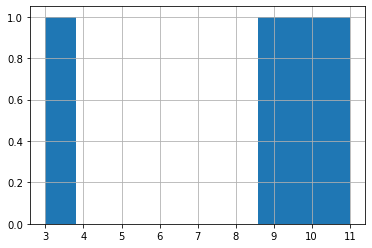

In [25]:
df['count'].hist()


## Read and process a CSV

Here we are using temperature data for Cheltenham, Victoria from [BOM](http://www.bom.gov.au/vic/forecasts/melbourne.shtml).

In [35]:
data = pd.read_csv('data/IDCJAC0010_086077_1800_Data.csv', 
                    usecols=['Year', 'Month', 'Day', 'Maximum temperature (Degree C)'])
data[data.Year == 1980].head()

,Year,Month,Day,Maximum temperature (Degree C)
3287,1980,1,1,19.6
3288,1980,1,2,31.4
3289,1980,1,3,33.6
3290,1980,1,4,20.4
3291,1980,1,5,19.3


Extract the Year, Month and Day columns into a date column.

In [71]:
df = pd.DataFrame(data=pd.to_datetime(data[['Year', 'Month', 'Day']]), columns=['date'])
df , df.dtypes , df.columns

(            date
 0     1971-01-01
 1     1971-01-02
 2     1971-01-03
 3     1971-01-04
 4     1971-01-05
 ...          ...
 18543 2021-10-08
 18544 2021-10-09
 18545 2021-10-10
 18546 2021-10-11
 18547 2021-10-12
 
 [18548 rows x 1 columns],
 date    datetime64[ns]
 dtype: object,
 Index(['date'], dtype='object'))

Append temperatures:

In [70]:
df['maximum'] = data['Maximum temperature (Degree C)']
df ,  df.dtypes ,  df.columns

(            date  maximum
 0     1971-01-01      NaN
 1     1971-01-02      NaN
 2     1971-01-03      NaN
 3     1971-01-04      NaN
 4     1971-01-05      NaN
 ...          ...      ...
 18543 2021-10-08     21.2
 18544 2021-10-09     25.0
 18545 2021-10-10     15.4
 18546 2021-10-11     14.5
 18547 2021-10-12     19.5
 
 [18548 rows x 2 columns],
 date       datetime64[ns]
 maximum           float64
 dtype: object,
 Index(['date', 'maximum'], dtype='object'))